In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [24]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
lat_lngs 

[(4.565769436536982, -124.2803228555449),
 (-23.866999802206195, 161.66348562103718),
 (81.5375085251085, -100.77308066027545),
 (-87.6165780444892, -146.83015719514307),
 (42.09201588168, 17.812299636517196),
 (-19.10763982332763, -76.66597229457099),
 (-15.557676830016092, -161.79303336419838),
 (16.22138899506423, -90.27840499675384),
 (-76.4375985476869, -120.88916192976568),
 (51.9509502007856, -121.75299474708052),
 (-6.592340552472862, -23.766139493238455),
 (-72.90888663182454, -9.85827053962197),
 (-86.78206744557417, 85.77461678017903),
 (41.32182296469904, 126.39606384665166),
 (-9.825629982154453, 122.55099489614321),
 (58.67354852495362, 90.96554254042894),
 (42.31063360591415, -130.121970477051),
 (-85.05655791768334, 29.681537030702003),
 (68.49231908321005, 34.04095380615908),
 (-29.13372443304374, -48.07921296597391),
 (-6.740320715300072, -125.25653809680148),
 (47.35624368742887, -127.07924203557809),
 (-9.94526779679532, 10.14430865755594),
 (-69.59595492877695, -17

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5585a396879ffcc8628536259c9f74b1


In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | voh
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | dubrovnik
Processing Record 6 of Set 1 | marcona
City not found. Skipping...
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | sayaxche
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | williams lake
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | erdaojiang
Processing Record 15 of Set 1 | kupang
Processing Record 16 of Set 1 | yeniseysk
Processing Record 17 of Set 1 | coos bay
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | revda
Processing Record 20 of Set 1 | laguna
Processing Record 21 of Set 1 | ucluelet
Processing Record 22 of Set 1 | luanda
Processing Reco

Processing Record 35 of Set 4 | gigmoto
Processing Record 36 of Set 4 | matagami
Processing Record 37 of Set 4 | mkushi
Processing Record 38 of Set 4 | paamiut
Processing Record 39 of Set 4 | vallenar
Processing Record 40 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 41 of Set 4 | san jeronimo
Processing Record 42 of Set 4 | putina
Processing Record 43 of Set 4 | namatanai
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | wahiawa
Processing Record 46 of Set 4 | portland
Processing Record 47 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 48 of Set 4 | bethel
Processing Record 49 of Set 4 | nelson bay
Processing Record 50 of Set 4 | touros
Processing Record 1 of Set 5 | cockburn town
Processing Record 2 of Set 5 | maridi
Processing Record 3 of Set 5 | klaksvik
Processing Record 4 of Set 5 | calama
Processing Record 5 of Set 5 | liku
Processing Record 6 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 7

Processing Record 22 of Set 8 | noumea
Processing Record 23 of Set 8 | lalpur
Processing Record 24 of Set 8 | buchanan
Processing Record 25 of Set 8 | brownsville
Processing Record 26 of Set 8 | ancud
Processing Record 27 of Set 8 | don marcelino
City not found. Skipping...
Processing Record 28 of Set 8 | atasu
Processing Record 29 of Set 8 | ust-maya
Processing Record 30 of Set 8 | tarakan
Processing Record 31 of Set 8 | indore
Processing Record 32 of Set 8 | ixtapa
Processing Record 33 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 34 of Set 8 | forbes
Processing Record 35 of Set 8 | sao joao da barra
Processing Record 36 of Set 8 | talnakh
Processing Record 37 of Set 8 | fort oglethorpe
Processing Record 38 of Set 8 | meyungs
City not found. Skipping...
Processing Record 39 of Set 8 | outjo
Processing Record 40 of Set 8 | tuatapere
Processing Record 41 of Set 8 | biak
Processing Record 42 of Set 8 | fortuna foothills
Processing Record 43 of Set 8 | bom jesus
Processing Recor

Processing Record 12 of Set 12 | artvin
Processing Record 13 of Set 12 | hirara
Processing Record 14 of Set 12 | guajara-mirim
City not found. Skipping...
Processing Record 15 of Set 12 | bathsheba
Processing Record 16 of Set 12 | mon
Processing Record 17 of Set 12 | saint anthony
Processing Record 18 of Set 12 | hanzhong
Processing Record 19 of Set 12 | yulara
Processing Record 20 of Set 12 | tank
Processing Record 21 of Set 12 | taitung
Processing Record 22 of Set 12 | dolores
Processing Record 23 of Set 12 | mizdah
Processing Record 24 of Set 12 | hobyo
Processing Record 25 of Set 12 | east wemyss
Processing Record 26 of Set 12 | vostok
Processing Record 27 of Set 12 | athabasca
Processing Record 28 of Set 12 | brasileia
Processing Record 29 of Set 12 | qingquan
Processing Record 30 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 31 of Set 12 | kieta
Processing Record 32 of Set 12 | ust-kuyga
Processing Record 33 of Set 12 | ostrovnoy
Processing Record 34 of Set

In [10]:
# Print the city count to confirm sufficient count.
len(cities)

622

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,81.77,74,100,17.29,PF,2020-02-21 21:51:09
1,Voh,-20.97,164.70,78.98,77,0,5.50,NC,2020-02-21 21:51:09
2,Yellowknife,62.46,-114.35,15.80,72,40,12.75,CA,2020-02-21 21:51:09
3,Mataura,-46.19,168.86,54.00,76,95,13.00,NZ,2020-02-21 21:51:09
4,Dubrovnik,42.65,18.09,53.60,31,0,20.80,HR,2020-02-21 21:51:09
5,Avarua,-21.21,-159.78,81.45,83,80,14.76,CK,2020-02-21 21:51:10
6,Sayaxche,16.52,-90.17,87.49,49,49,2.04,GT,2020-02-21 21:51:10
7,Punta Arenas,-53.15,-70.92,66.20,48,75,21.92,CL,2020-02-21 21:51:10
8,Williams Lake,52.14,-122.14,35.60,51,75,14.99,CA,2020-02-21 21:51:11
9,Georgetown,5.41,100.34,80.60,83,20,9.17,MY,2020-02-21 21:46:41


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2020-02-21 21:51:09,-9.80,-139.03,81.77,74,100,17.29
1,Voh,NC,2020-02-21 21:51:09,-20.97,164.70,78.98,77,0,5.50
2,Yellowknife,CA,2020-02-21 21:51:09,62.46,-114.35,15.80,72,40,12.75
3,Mataura,NZ,2020-02-21 21:51:09,-46.19,168.86,54.00,76,95,13.00
4,Dubrovnik,HR,2020-02-21 21:51:09,42.65,18.09,53.60,31,0,20.80


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

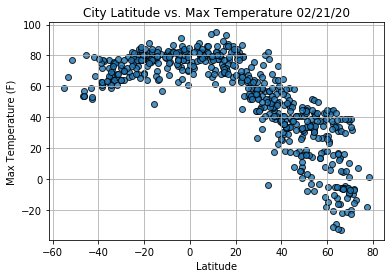

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

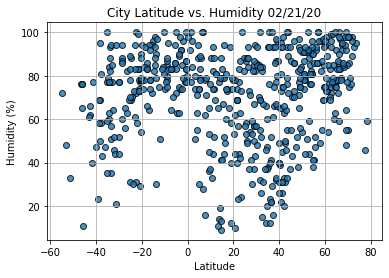

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

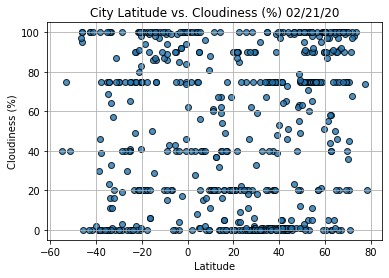

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

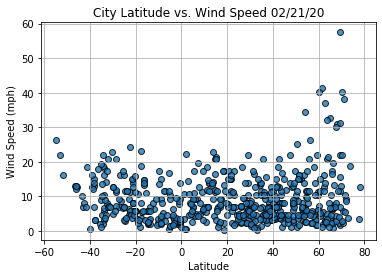

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()